<a href="https://colab.research.google.com/github/kristapsjanis/bachelor-s/blob/main/atvertais_kods_laikrindas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atvērtais  kods: Lineārā Regresija, Izlases mežs, ARIMA modelis

Datu kopa ManuaLoaDailyTemps tika aizgūta: https://github.com/nachi-hebbar/ARIMA-Temperature_Forecasting/blob/master/MaunaLoaDailyTemps.csv

In [ ]:
pip install pmdarima # ARIMA modeļa bibliotēkas instalēšana

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd # bibliotēka importēta datu apstrādei un darbam ar datu kopu csv faila formātā
df = pd.DataFrame() # Datu rāmis (Data frame) divdimensiju masīva manipulācijām, jo darbs ir ar datiem, rindām un kolonnām
import numpy as np # bibliotēka importēta lieārās algebras izmantošanai

Tiek importēta aizgūta datu kopa "ManuaLoaDailyTemps"

In [ ]:
df=pd.read_csv('/content/MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Datu kopas statistika (Ierakstu skaits, kolonnu skaits)',df.shape)
df.head()

Datu kopas statistika (Ierakstu skaits, kolonnu skaits) (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


Datu kopas "MaunaLoaDailyTemps" datu tipi, kopas grafiskais attēlojums

<Axes: xlabel='DATE'>

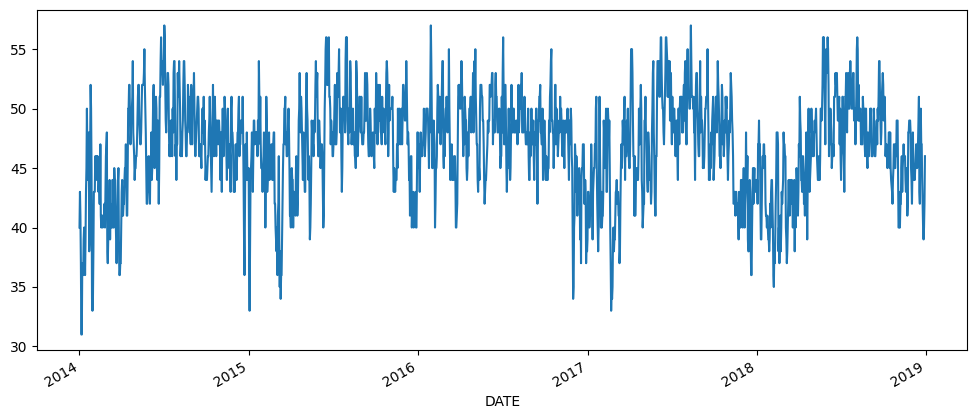

In [ ]:
df['AvgTemp'].plot(figsize=(12,5)) # Vidējās temperatūras (AvgTemp) grafiskais attēlojums visā datu kopā
plt.ylabel(" Vidējā temperatūra")
plt.xlabel("Laikrindas ieraksts")
plt.legend(loc="upper left")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


<Axes: >

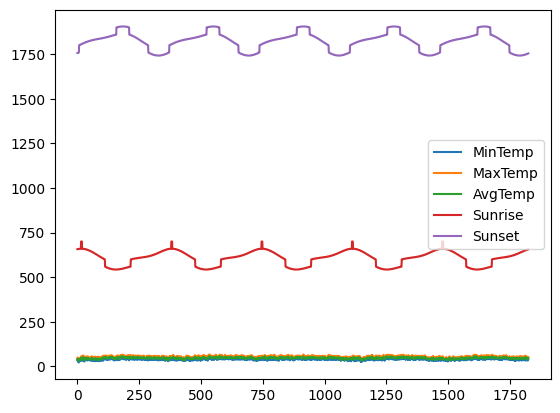

In [ ]:
df=pd.read_csv('MaunaLoaDailyTemps.csv')
df.info()
df.plot()

In [ ]:
df=df.dropna()
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


Datu stacionaritātes noteikāsana izmantojot Augmented Dickey-Fuller (ADF) testu

In [ ]:
from statsmodels.tsa.stattools import adfuller # ADF testa implementācija caur statsmodelbibliotēku, laipārbaudītu vienības sakni viendimensiju procesā seriālas korelācijas klātbūtnē

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['AvgTemp']) # izvadīti ADF testa rezultāti, datu kopas stacioantitāts pārbaudei

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


Automātiskā ARIMA modeļa implementācija no pmdarima bibliotēkas

In [ ]:
from pmdarima import auto_arima

import warnings # bibliotēkas implementēšana nekaitīgu brīdinājumu igonrēšanai
warnings.filterwarnings("ignore")

Stepwise pieejas implementācija efektīvākajām ARIMA modeļa p, d, q vērtībām un sezionalitātei

In [ ]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=7.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=6.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=8.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=9.65 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=10.03 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=8.68 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=10.82 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=5.21 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=7.72 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=5.50 sec
 ARIMA(1,0,4)(0,0,0)[0] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Sun, 26 May 2024   AIC                           8295.034
Time:                        23:03:32   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 Datu kopas sadale testa un apmācības datos prognozes pārbaudei pēdējās 30 dienās

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

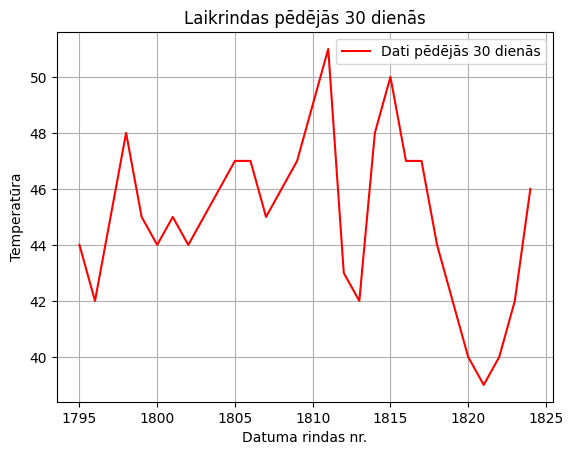

In [ ]:
 # reālais datu kopas attēlojums pēdējo 30 dienu laikā
actual_last_30 = df.iloc[-30:]
plt.plot(actual_last_30.index, actual_last_30['AvgTemp'], label='Dati pēdējās 30 dienās', color='red')
plt.title('Laikrindas pēdējās 30 dienās')
plt.xlabel('Datuma rindas nr.')
plt.ylabel('Temperatūra')
plt.legend()
plt.grid(True)
plt.show()

ARIMA modeļa implementācija

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Datu kopas sadalīšana testēšanas un apmācīšanas datos
print(df.shape)
train=df.iloc[:-30] #neteik ņemtas vērā pēdējās 30 rindas no datu kopas
test=df.iloc[-30:] #teik ņemtas vērā tikai pēdējās 30 rindas no datu kopas
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(1821, 6)
(1791, 6) (30, 6)


ARIMA modeļa trenēšana

In [ ]:
model=ARIMA(train['AvgTemp'], order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Sun, 26 May 2024   AIC                           8156.395
Time:                        23:03:45   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prognozes izveide ar testa datiem

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

1795    44.754109
1796    44.987795
1797    45.388741
1798    45.721545
1799    45.863733
1800    45.874126
1801    45.884370
1802    45.894466
1803    45.904417
1804    45.914225
1805    45.923891
1806    45.933418
1807    45.942808
1808    45.952063
1809    45.961185
1810    45.970175
1811    45.979036
1812    45.987769
1813    45.996377
1814    46.004861
1815    46.013222
1816    46.021463
1817    46.029586
1818    46.037591
1819    46.045481
1820    46.053258
1821    46.060923
1822    46.068477
1823    46.075922
1824    46.083261
Name: predicted_mean, dtype: float64


Testa datu prgonozes "AvgTemp" datiem un prognozes vidējā "predicted_mean" attēlojums

In [ ]:
import matplotlib.pyplot as plt

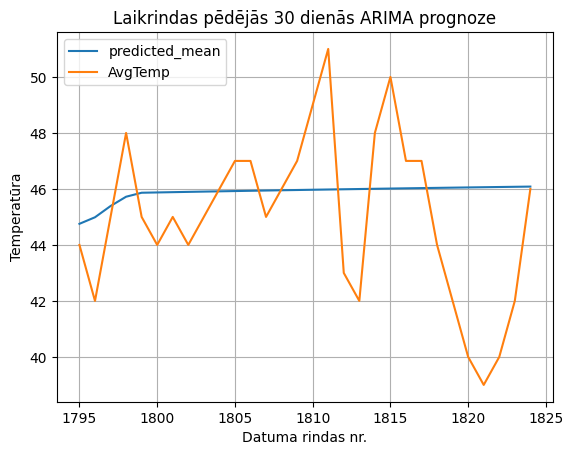

In [ ]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)
plt.title('Laikrindas pēdējās 30 dienās ARIMA prognoze')
plt.xlabel('Datuma rindas nr.')
plt.ylabel('Temperatūra')
plt.legend()
plt.grid(True)
plt.show()

Testa datu vidējā vērtība

In [ ]:
test['AvgTemp'].mean()

45.0

Kvadrātiskās kļūdas noteikšana starp prognozētajiem un testa datiem

In [ ]:
from sklearn.metrics import mean_squared_error #vidējās kvadrātiskās kļūdas imports
from math import sqrt #kvadrātsaknes imports no matemātikas bibliotēkas
rmse = sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463825206671


Salīdzinot testa datu vidējo vērtību un kvadrātisko kļūdu no prognozētajiem datiem tiek secināts, ka kļūdas koeficients prgnozētajiem datiem ir 3, procentuāli 6,66%

Prognozes izveide balstoties uz datu kopu

In [ ]:
model2=ARIMA(df['AvgTemp'], order=(1,0,5))
model2=model2.fit()
df.tail()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753
1824,12/30/2018,39.0,52.0,46.0,656,1754


Datu definēšana prognozei nākamajām 30 dienām

In [ ]:
index_future_dates=pd.date_range(start='2018-12-31',end='2019-01-30')
pred=model2.predict(start=len(df), end=len(df)+30, typ='levels').rename('ARIMA prognoze')
pred.index=index_future_dates
print(pred)

2018-12-31    46.418166
2019-01-01    46.113912
2019-01-02    45.617874
2019-01-03    45.249566
2019-01-04    45.116916
2019-01-05    45.136666
2019-01-06    45.156140
2019-01-07    45.175341
2019-01-08    45.194274
2019-01-09    45.212942
2019-01-10    45.231349
2019-01-11    45.249498
2019-01-12    45.267394
2019-01-13    45.285038
2019-01-14    45.302436
2019-01-15    45.319591
2019-01-16    45.336505
2019-01-17    45.353183
2019-01-18    45.369628
2019-01-19    45.385842
2019-01-20    45.401830
2019-01-21    45.417593
2019-01-22    45.433137
2019-01-23    45.448462
2019-01-24    45.463574
2019-01-25    45.478474
2019-01-26    45.493165
2019-01-27    45.507651
2019-01-28    45.521934
2019-01-29    45.536017
2019-01-30    45.549904
Freq: D, Name: ARIMA prognoze, dtype: float64


Prognozes attēlojums

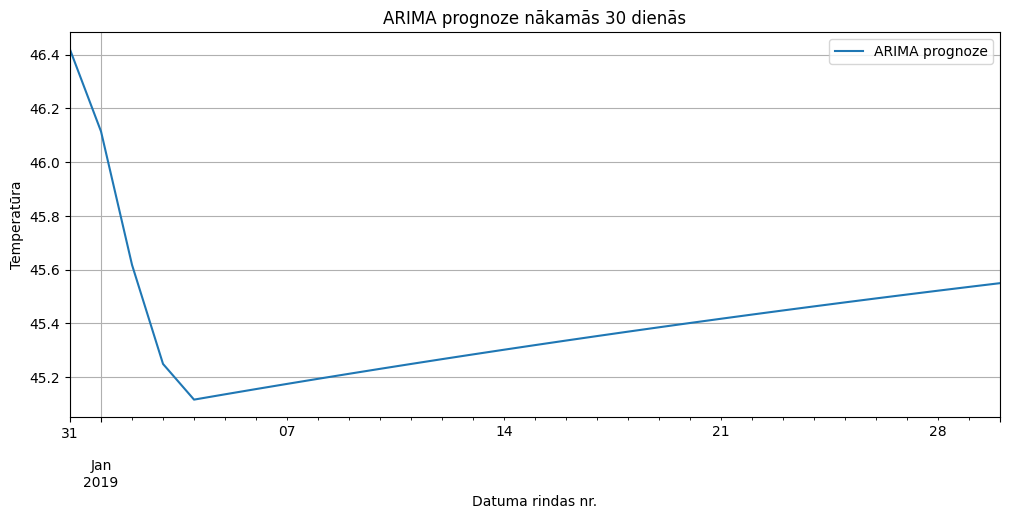

In [ ]:
import matplotlib.pyplot as plt
pred.plot(figsize=(12,5), legend=True)
plt.title('ARIMA prognoze nākamās 30 dienās')
plt.xlabel('Datuma rindas nr.')
plt.ylabel('Temperatūra')
plt.legend()
plt.grid(True)
plt.show()

Mean Absolute Error (MAE): 3.0457275183801955
Mean Squared Error (MSE): 14.393427558102688
Root Mean Squared Error (RMSE): 3.7938670981075084
Mean Absolute Percentage Error (MAPE): 0.06635779525698252


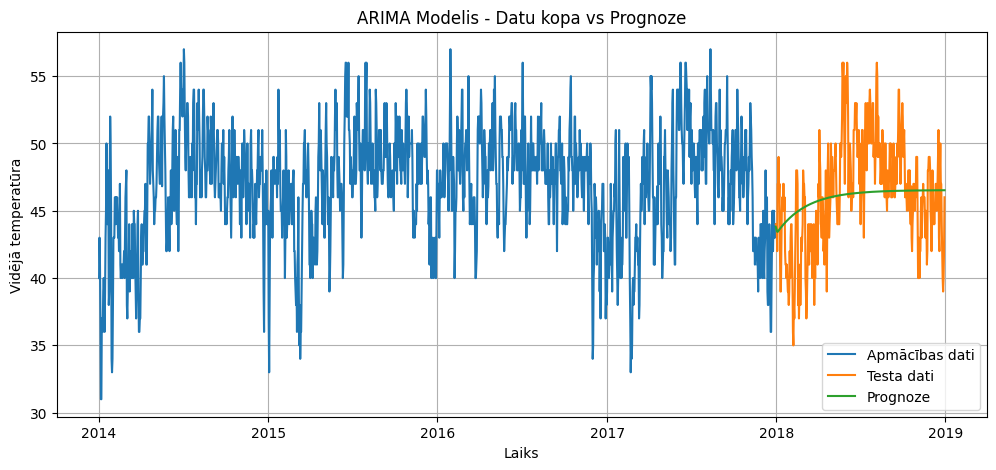

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# csv faila lasīšana un laika parsēšana
df = pd.read_csv('MaunaLoaDailyTemps.csv', parse_dates=['DATE'], index_col='DATE')

# trūkstošo vērtību apstrāde
df['AvgTemp'].fillna(df['AvgTemp'].mean(), inplace=True)

#  frekvences definēšana indeksam
if df.index.freq is None:
    df = df.asfreq('D')

# testa datu un apācības datu sadale
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ARIMA testa datiem
model = ARIMA(train['AvgTemp'], order=(1, 0, 5))
model_fit = model.fit()

# prognoze
predictions = model_fit.forecast(steps=len(test))
test['Predictions'] = predictions

# precizitātes noteikšana
mae = mean_absolute_error(test['AvgTemp'], test['Predictions'])
mse = mean_squared_error(test['AvgTemp'], test['Predictions'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['AvgTemp'], test['Predictions'])

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

plt.figure(figsize=(12, 5))
plt.plot(train.index, train['AvgTemp'], label='Apmācības dati')
plt.plot(test.index, test['AvgTemp'], label='Testa dati')
plt.plot(test.index, test['Predictions'], label='Prognoze')
plt.title('ARIMA Modelis - Datu kopa vs Prognoze')
plt.xlabel('Laiks')
plt.ylabel('Vidējā temperatūra')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Izvadīts datu kopas fragments ar pievienotām 4 kolonām pēdējo 4 mēnešu iepriekšējām vērtībām
df['AvgTemp_LastMonth']=df['AvgTemp'].shift(+1)
df['AvgTemp_2Monthsback']=df['AvgTemp'].shift(+2)
df['AvgTemp_3Monthsback']=df['AvgTemp'].shift(+3)
df['AvgTemp_4Monthsback']=df['AvgTemp'].shift(+4)
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,AvgTemp_LastMonth,AvgTemp_2Monthsback,AvgTemp_3Monthsback,AvgTemp_4Monthsback
DATE,,,,,,,,,
2014-01-01,33.0,46.0,40.0,657,1756,NaN,NaN,NaN,NaN
2014-01-02,35.0,50.0,43.0,657,1756,40.0,NaN,NaN,NaN
2014-01-03,36.0,45.0,41.0,657,1757,43.0,40.0,NaN,NaN
2014-01-04,32.0,41.0,37.0,658,1757,41.0,43.0,40.0,NaN
2014-01-05,24.0,38.0,31.0,658,1758,37.0,41.0,43.0,40.0
...,...,...,...,...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752,42.0,44.0,47.0,47.0
2018-12-27,33.0,44.0,39.0,655,1752,40.0,42.0,44.0,47.0
2018-12-28,33.0,47.0,40.0,655,1753,39.0,40.0,42.0,44.0


In [ ]:
df=df.dropna() # izņem trūkstošās vērtības(NaN) no datu kopas
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,AvgTemp_LastMonth,AvgTemp_2Monthsback,AvgTemp_3Monthsback,AvgTemp_4Monthsback
DATE,,,,,,,,,
2014-01-05,24.0,38.0,31.0,658,1758,37.0,41.0,43.0,40.0
2014-01-06,22.0,39.0,31.0,658,1759,31.0,37.0,41.0,43.0
2014-01-07,28.0,45.0,37.0,658,1759,31.0,31.0,37.0,41.0
2014-01-08,30.0,41.0,36.0,659,1800,37.0,31.0,31.0,37.0
2014-01-09,29.0,42.0,36.0,659,1801,36.0,37.0,31.0,31.0
...,...,...,...,...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752,42.0,44.0,47.0,47.0
2018-12-27,33.0,44.0,39.0,655,1752,40.0,42.0,44.0,47.0
2018-12-28,33.0,47.0,40.0,655,1753,39.0,40.0,42.0,44.0


In [ ]:
df.tail() # izvadītas pēdējās datu kopas piecas rindas

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,AvgTemp_LastMonth,AvgTemp_2Monthsback,AvgTemp_3Monthsback,AvgTemp_4Monthsback
DATE,,,,,,,,,
2018-12-26,35.0,45.0,40.0,654,1752,42.0,44.0,47.0,47.0
2018-12-27,33.0,44.0,39.0,655,1752,40.0,42.0,44.0,47.0
2018-12-28,33.0,47.0,40.0,655,1753,39.0,40.0,42.0,44.0
2018-12-29,36.0,47.0,42.0,655,1753,40.0,39.0,40.0,42.0
2018-12-30,39.0,52.0,46.0,656,1754,42.0,40.0,39.0,40.0


In [ ]:
from sklearn.linear_model import LinearRegression # lineārās regresijas algoritma implementācija
lin_model=LinearRegression()# Lienārās Regresijas algoritma piešķiršana mainīgajam

In [ ]:
from sklearn.ensemble import RandomForestRegressor #random forest regression algoritma implementācija
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1) #random forest regression algoritma piešķiršama mainīgajam un regresijas izvēles koka parametru noteikšana

Datu priekšapstrāde, vidējās temperatūras vērtības no pēdējiem 4 mēnešiem tiek uzglabātas masīva formātā

In [ ]:
import numpy as np # bibliotēka importēta lieārās algebras izmantošanai
x1,x2,x3,x4,y=df['AvgTemp_LastMonth'],df['AvgTemp_2Monthsback'],df['AvgTemp_3Monthsback'],df['AvgTemp_4Monthsback'],df['AvgTemp']
x1,x2,x3,x4,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(y)
x1,x2,x3,x4,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4),axis=1)
print(final_x)

[[37. 41. 43. 40.]
 [31. 37. 41. 43.]
 [31. 31. 37. 41.]
 ...
 [39. 40. 42. 44.]
 [40. 39. 40. 42.]
 [42. 40. 39. 40.]]


Apstrādes datu vērtības tiek sadalītas apmācības un testēšanas datos, kur tiek izmantots datu koridors 60 vērtību mērogā

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]
#X_train, X_test, y_train, y_test = train_test_split(final_x, y, test_size=0.1, random_state=42)

#[:-30] - neteik ņemtas vērā pēdējās 30 rindas no datu kopas
#[-30:] - teik ņemtas vērā tikai pēdējās 30 rindas no datu kopas

In [ ]:
model.fit(X_train,y_train) # random forest

RandomForestRegressor(max_features=3, random_state=1)

In [ ]:
lin_model.fit(X_train,y_train) # linear regresion

LinearRegression()

Algorita random forest prognozes implementēšana un attēlojums

In [ ]:
#np.shape(X_train)
print(X_train.shape) # masīvs(rindas, kolonnas)
print(y_train.shape) # masīvs(rindas, kolonnas)

(1787, 4)
(1787, 1)


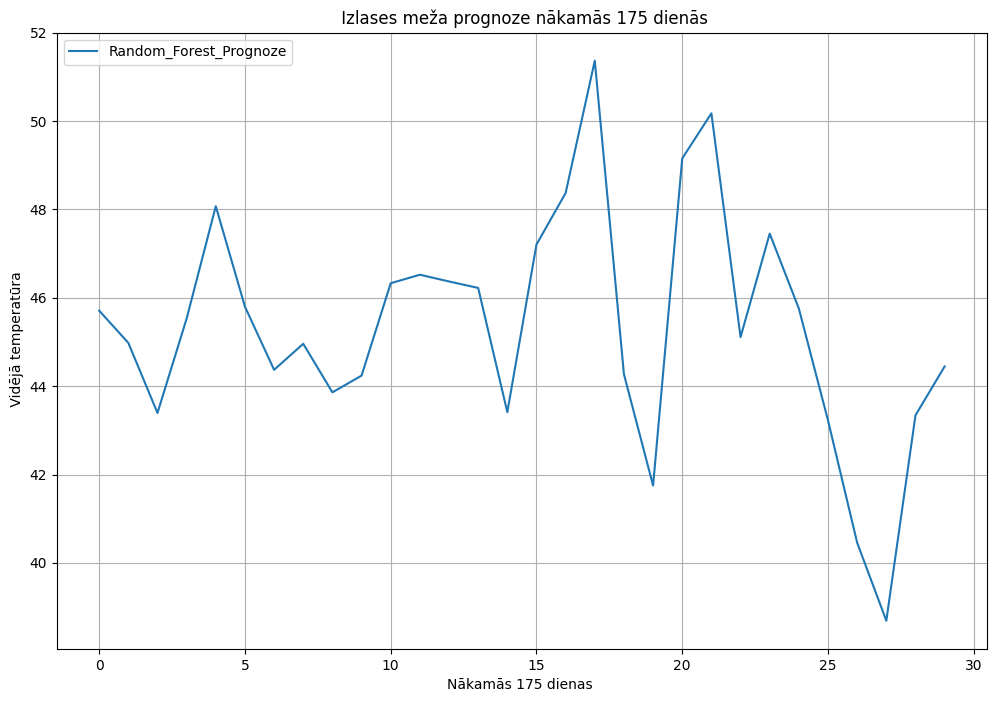

In [ ]:
pred=model.predict(X_test) # prognozes izveide uz testa datu kopas
import matplotlib.pyplot as plt # implementēts datu attēlojumam
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Prognoze')
plt.title(' Izlases meža prognoze nākamās 175 dienās')
plt.xlabel("Nākamās 175 dienas ")
plt.ylabel(" Vidējā temperatūra")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


Lineārās regresijas algoritma prognozes implementēšana un attēlojums

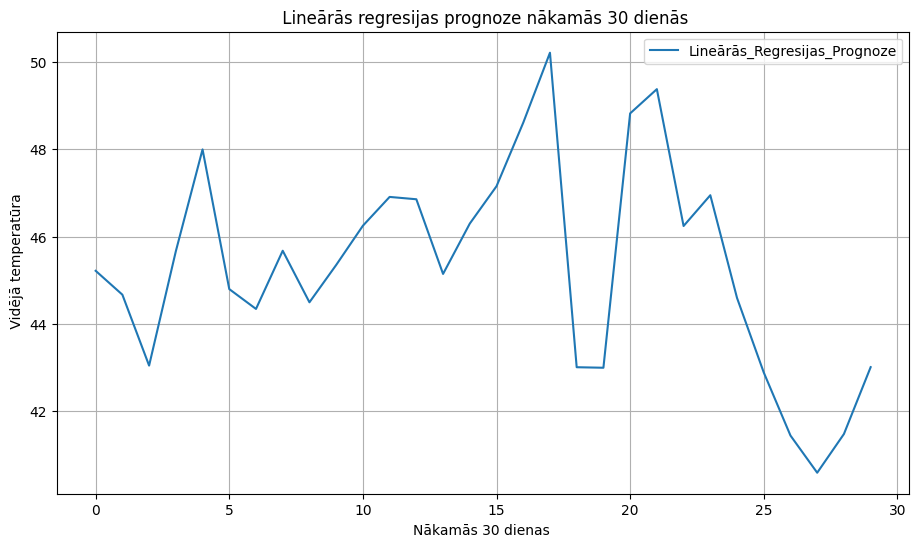

In [ ]:
lin_pred=lin_model.predict(X_test) # prognozes izveide uz testa datu kopas
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Lineārās_Regresijas_Prognoze')
plt.legend(loc="upper right")
plt.xlabel("Nākamās 30 dienas ")
plt.ylabel(" Vidējā temperatūra")
plt.title(' Lineārās regresijas prognoze nākamās 30 dienās')
plt.grid(True)
plt.show()

Vidējā precizitātes koeficiena noteikšana

In [ ]:
from sklearn.metrics import mean_squared_error # aprēķiņu nolūkos implementēta bibliotēka
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [ ]:
print('Vidējā kvadrātiskā kļūda Random Forest modelim:',rmse_rf)
print('Vidējā kvadrātiskā kļūda Lineārajam Regresijas modelim:',rmse_lr)

Vidējā kvadrātiskā kļūda Random Forest modelim: 2.814060704623402
Vidējā kvadrātiskā kļūda Lineārajam Regresijas modelim: 2.3852106450878896
